<a href="https://colab.research.google.com/github/PathaAkash/AIML-2025/blob/main/AIML_LABEXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/house_price_regression_dataset.csv')
X = data.drop(columns=['House_Price'])
y = data['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

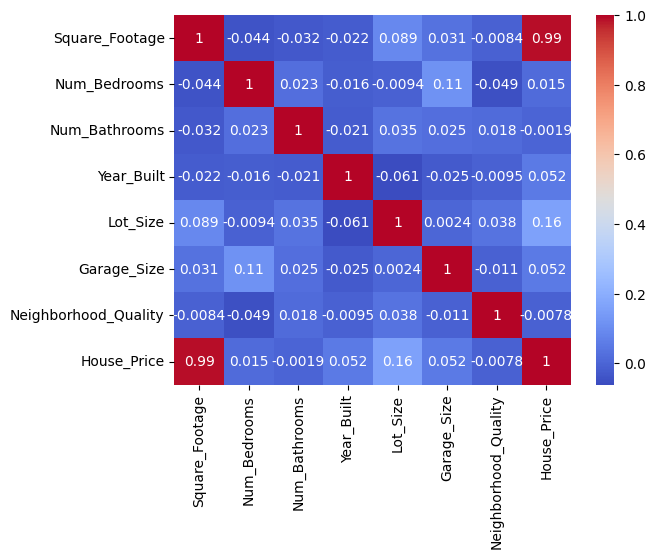

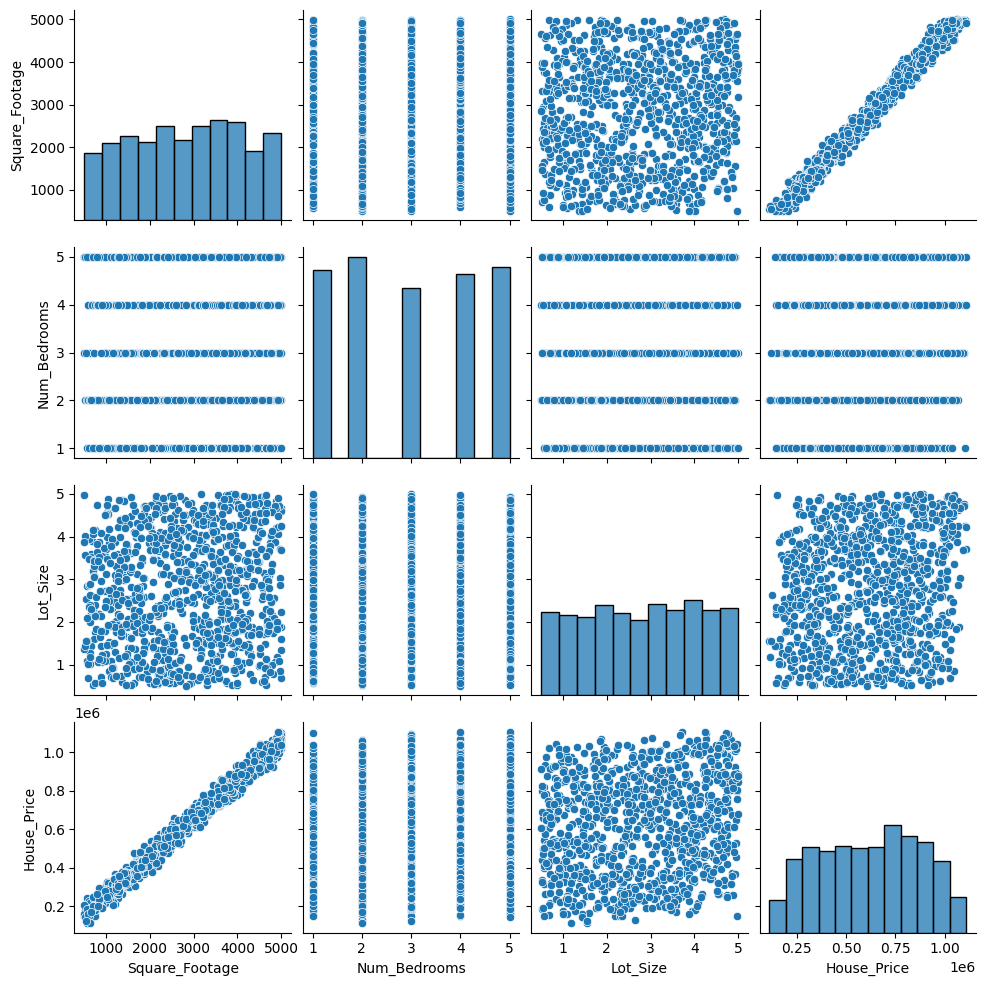

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(data[['Square_Footage', 'Num_Bedrooms', 'Lot_Size', 'House_Price']])
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))


Train R2: 0.9985375946918145
Test R2: 0.9984263636823413
Test MAE: 8174.583600006616
Test RMSE: 10071.484424137083


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


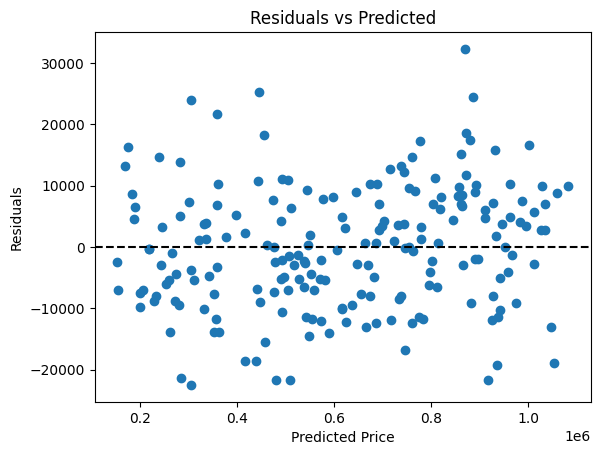

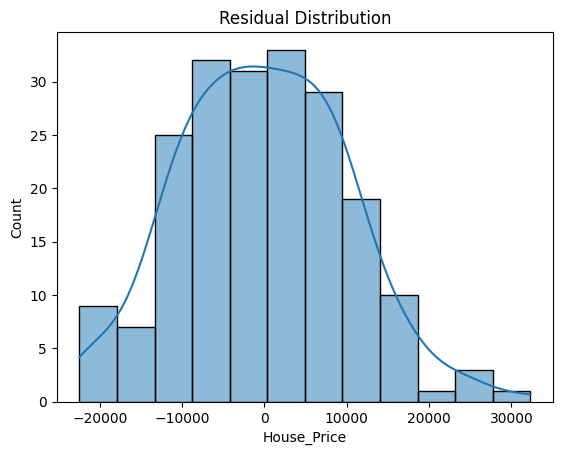

In [6]:
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
